# CNN은 필터를 학습시키는 것
- 대체 필터가 어떻게 생겼는지 보겠다.
- 학습된 필터가 어떻게 생겼는지 확인.

In [311]:
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
import cv2
from sklearn.model_selection import train_test_split
import keras.utils as utils

## callable은 이미 생성된 객체에 대해서 함수처럼 호출할 수 있도록 함.

In [12]:
# __init__ => 객체 생성자


class MyLayer : 
    def __init__(self, unit ) :
        self.unit = unit
        print('unit', unit)
        print("hello")
        
    def test(self, v) :
        print(v)
        
    def __call__(self, v) :
        print(self.unit, v)
        return self
        
        
# A = MyLayer()
# A.test(10)
# A(20)


# A = MyLayer()(20)
# A = MyLayer()
# A(20)

# A = MyLayer(20)([1,2,3,4,5])
# A 는 클래스

A = MyLayer(20)
A([1,2,3,4,5])
A([3,3,4])
A.test(4)


B = MyLayer(50)
C = MyLayer(50)




unit 20
hello
20 [1, 2, 3, 4, 5]
20 [3, 3, 4]
unit 50
hello
unit 50
hello


# faces 인식

In [144]:
from sklearn.datasets import fetch_olivetti_faces
import cv2

orl = fetch_olivetti_faces()
data = orl.data   # 0 ~ 1로 정규화 되어있음
target = orl.target


# 샘플 수 = 400 개
# CNN에 적용하려면 4차원으로 만들어줘야함

print(data.shape)
print(target.shape)
print(data[0])

(400, 4096)
(400,)
[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


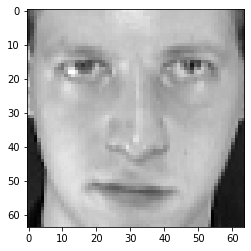

In [146]:
# data[0, :]  ->  data에서 0행의 모든 것들 가져와라 -> 첫번째 사람
# 한 사람당 10장씩

plt.imshow( data[2,:].reshape(64,64) , cmap='gray')

In [228]:
data = np.zeros((400, 32 * 32), dtype = 'uint8')

# index도 함께 넣어주는 함수 = enumerate

for i, d in enumerate(orl.data) : 
    image = cv2.resize(d.reshape(64, 64), (32, 32))
    data[i, :] = image.flatten() * 255
    

print(data.shape)

(400, 1024)


# training set / test set 나누기

In [229]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data, target, test_size = 0.2)
    
print(X_train.shape)  # train data
print(X_val.shape)    # test data

(320, 1024)
(80, 1024)


In [230]:
X_train = X_train.reshape(-1, 32, 32, 1)
X_val = X_val.reshape(-1, 32, 32, 1)

# train / test 의 y 데이터 둘다 원핫 인코딩 해줌
y_train_e = utils.to_categorical(y_train, 40)
y_val_e = utils.to_categorical(y_val, 40)

X_train = X_train / 255
X_val = X_val / 255

print(X_train.shape)
print(y_train_e.shape)
print(X_val.shape)
print(y_val_e.shape)

(320, 32, 32, 1)
(320, 40)
(80, 32, 32, 1)
(80, 40)


In [231]:
input_shape = (32, 32, 1)
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), padding = 'same' ,
                     activation='relu',input_shape=input_shape, name="conv1_1"))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',
                     activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu')) 
model.add(Dense(40, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_29 (Dense)             (None, 40)              

In [232]:
history = model.fit(X_train, y_train_e ,
                        batch_size=20,
                        epochs=40,
                        verbose=1,
                        validation_data=(X_val, y_val_e ))

Epoch 1/40
16/16 [==============================] - 0s 21ms/step - loss: 3.7140 - accuracy: 0.0281 - val_loss: 3.6865 - val_accuracy: 0.0000e+00
Epoch 2/40
16/16 [==============================] - 0s 18ms/step - loss: 3.6702 - accuracy: 0.0437 - val_loss: 3.6890 - val_accuracy: 0.0500
Epoch 3/40
16/16 [==============================] - 0s 18ms/step - loss: 3.6183 - accuracy: 0.0844 - val_loss: 3.6414 - val_accuracy: 0.0875
Epoch 4/40
16/16 [==============================] - 0s 18ms/step - loss: 3.4743 - accuracy: 0.2000 - val_loss: 3.4681 - val_accuracy: 0.2250
Epoch 5/40
16/16 [==============================] - 0s 18ms/step - loss: 3.0857 - accuracy: 0.3281 - val_loss: 3.0640 - val_accuracy: 0.2625
Epoch 6/40
16/16 [==============================] - 0s 18ms/step - loss: 2.4637 - accuracy: 0.4313 - val_loss: 2.3927 - val_accuracy: 0.5375
Epoch 7/40
16/16 [==============================] - 0s 18ms/step - loss: 1.6049 - accuracy: 0.6687 - val_loss: 1.7786 - val_accuracy: 0.6000
Epoch 8/4

In [233]:
model.evaluate(X_val, y_val_e)

3/3 [==============================] - 0s 4ms/step - loss: 0.3009 - accuracy: 0.9500


[0.3009258806705475, 0.949999988079071]

# filters 확인

In [171]:
print(type(model.layers))

<class 'list'>


In [172]:
for layer in model.layers:
    print(layer.name)

print(model.layers[0].name)

conv1_1
max_pooling2d_20
conv2d_20
max_pooling2d_21
flatten_11
dense_22
dense_23
conv1_1


In [173]:
W = model.layers[0].get_weights()
print(len(W))
print(W[0].shape)
print(W[1].shape)

2
(3, 3, 1, 16)
(16,)


In [174]:
filters = W[0]

## 첫번째 레이어의 첫번째 필터 / 두번째 필터

In [175]:
f1= filters[:,:,0, 0]
print(f1)
f2= filters[:,:,0, 1]
print(f2)

[[ 0.199928    0.11168439 -0.02311917]
 [ 0.06074731  0.2632914  -0.03513249]
 [ 0.11447246  0.06099636  0.24286288]]
[[-0.03521364 -0.09591223  0.21789984]
 [-0.13721056 -0.09193237  0.07099394]
 [-0.21232396  0.12273543  0.11090189]]


In [176]:
# 풀링층은 학습된 데이터가 없기 때문에 레이어가 없음
W = model.layers[1].get_weights()
print(W)

[]


(3, 3, 16, 32)
[[ 0.03296982 -0.08651742  0.07652294]
 [-0.11292697  0.08781037 -0.00014273]
 [-0.05908889  0.01155394 -0.11757559]]


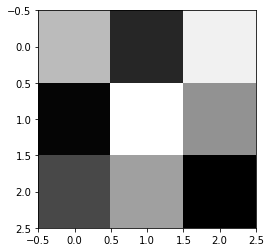

In [177]:
W2 = model.layers[2].get_weights()
filters = W2[0]
print(filters.shape)

f1= filters[:,:,0, 0]
print(f1)

plt.imshow(f1, cmap='gray')

In [178]:
from keras.models import Model

model2 = Model(inputs=model.inputs, outputs=model.layers[0].output)

In [195]:
I = X_train[4:5,:,:,:]
print(I.shape)

(1, 28, 28, 1)


(1, 28, 28, 16)


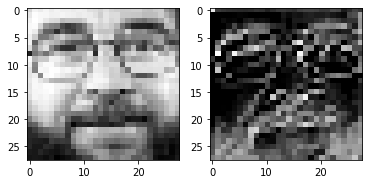

In [196]:
feature_maps = model2.predict(I)
print(feature_maps.shape)

img = feature_maps[0, :,:, 2]

plt.subplot(121)
plt.imshow(I[0, :,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(img, cmap='gray')

In [226]:
W2 = model.layers[0].get_weights()
filters = W2[0]
f1= filters[:,:,0, 2]
print(f1)

img = feature_maps[0, :,:, 2]
print(img)

[[ 0.16572146 -0.01156901  0.04993008]
 [ 0.04448877 -0.1620253  -0.06433745]
 [-0.17959322 -0.06314638 -0.03077582]]
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00695574 0.        ]
 [0.00255638 0.         0.01465665 0.00527239 0.01850224 0.00216771
  0.         0.00109872 0.         0.         0.         0.00283066
  0.02804055 0.01050022]
 [0.         0.00489837 0.         0.01220421 0.         0.
  0.00680969 0.01987273 0.03826961 0.02315988 0.02680265 0.02796149
  0.05426043 0.03668522]
 [0.         0.         0.         0.         0.         0.
  0.         0.01616457 0.02386529 0.         0.         0.
  0.01722893 0.04845436]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.01210762 

# 16개 필터 어떤지 확인

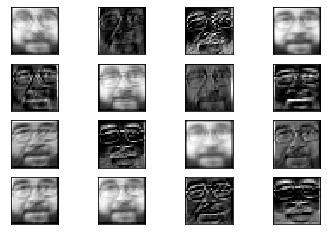

In [198]:
for ix in range(16) :
    ax = plt.subplot(4,4, ix+1)     
    fm = feature_maps[0,:,:,ix]
    plt.imshow(fm, cmap='gray')  
    ax.set_xticks([])
    ax.set_yticks([])

# 두번째 필터 확인

(1, 32, 32, 1)
(1, 16, 16, 32)


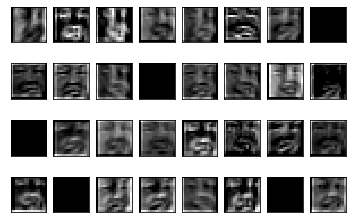

In [242]:
model3 = Model(inputs=model.inputs, outputs=model.layers[2].output)
I = X_train[169:170, : ,: ,:]


feature_maps = model3.predict(I)
print(feature_maps.shape)
plt.imshow(I[0, :,:,0], cmap='gray')

for ix in range(32) :
    ax = plt.subplot(4, 8, ix +1)
    fm = feature_maps[0,:,:,ix]
    plt.imshow(fm, cmap = 'gray')
    ax.set_xticks([])
    ax.set_yticks([])

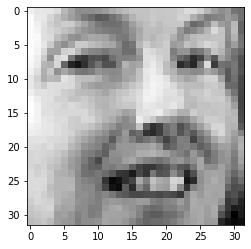

In [244]:
plt.imshow(I.reshape(32,32), cmap = 'gray')

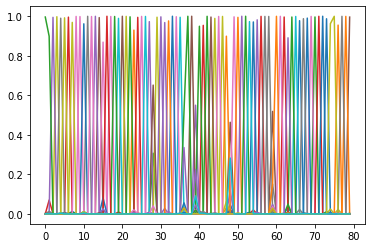

In [249]:
p = model.predict(X_val)

np.max(    p,   axis   =   1    )

plt.plot(p)

# 정규화

In [258]:
d = np.array([10, 80, 20, 50, 20, 60, 70, 20, 40]) 

n = d / np.max(d)

print(n)

# 평균을 빼고 표준편차로 나눠줌( 가장 좋은 방식 )
n = ( d - np.mean(d) ) / np.std(d)

print(np.mean(n))
print(np.std(n))



[0.125 1.    0.25  0.625 0.25  0.75  0.875 0.25  0.5  ]
-1.3800688986659932e-16
1.0


In [271]:
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size = 0.2)

X_train = X_train.reshape(-1, 32, 32, 1) / 255
X_val = X_val.reshape(-1, 32, 32, 1) / 255


y_train_e = utils.to_categorical(y_train, 40)
y_val_e = utils.to_categorical(y_val, 40)


In [305]:
input_shape = (32, 32, 1)
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), padding = 'same' ,input_shape=input_shape))

# 정규화 하고 activation 하기 !!
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same',
                     activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())


model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(40))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [304]:
model.summary()

# history = model.fit(X_train, y_train_e ,
#                         batch_size=20,
#                         epochs=40,
#                         verbose=1,
#                         validation_data=(X_val, y_val_e ))

# model.evaluate(X_val, y_val_e)

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 8, 8, 32)        

# 마지막 데이터 : Fashion MNIST

In [312]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)

X_train = X_train / 255
X_test = X_test / 255

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


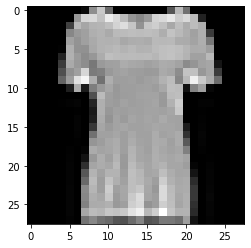

In [279]:
# 4차원이니까 2차원으로 reshape해줘야 plt.imshow로 보임
plt.imshow(X_train[10].reshape(28, 28), cmap = 'gray')

# dropout
- 특정 weight(W)를 0 으로 만들어버리겠다.

In [315]:
model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 50, 
                 kernel_size = (3,3), strides = (1,1), padding = 'same'))

model.add(BatchNormalization())
model.add(Dropout(0.5)) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(10, activation = 'softmax'))

# learning rate , 
adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam, metrics = ['accuracy'])
history = model.fit(X_train, y_train_e, 
                    batch_size = 100, epochs = 1, verbose = 1)

600/600 [==============================] - 84s 141ms/step - loss: 0.7054 - accuracy: 0.7782
